In [111]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

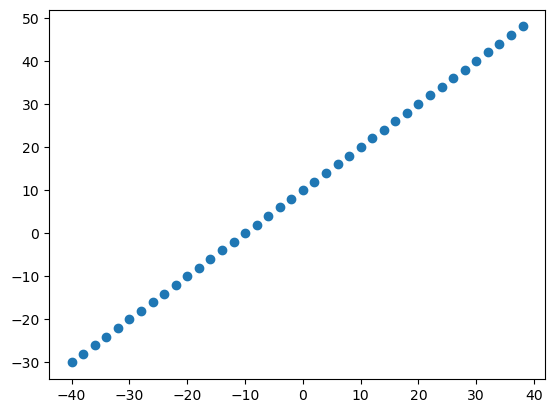

In [32]:
# create data
# y = x + 10
x = np.arange(-40, 40, 2)
y = x + 10
plt.scatter(x, y);

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [100]:
# build model
tf.random.set_seed(42) # for reproducibility

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(1))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [101]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 21.5896 - mae: 21.5896 - val_loss: 18.2120 - val_mae: 18.2120
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 20.9192 - mae: 20.9192 - val_loss: 17.7043 - val_mae: 17.7043
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 20.1919 - mae: 20.1919 - val_loss: 17.2081 - val_mae: 17.2081
Epoch 4/50
1/1 [==============================] - 0s 54ms/step - loss: 19.4953 - mae: 19.4953 - val_loss: 16.5879 - val_mae: 16.5879
Epoch 5/50
1/1 [==============================] - 0s 58ms/step - loss: 18.6836 - mae: 18.6836 - val_loss: 15.9951 - val_mae: 15.9951
Epoch 6/50
1/1 [==============================] - 0s 66ms/step - loss: 17.7715 - mae: 17.7715 - val_loss: 15.4498 - val_mae: 15.4498
Epoch 7/50
1/1 [==============================] - 0s 58ms/step - loss: 16.8841 - mae: 16.8841 - val_loss: 15.5366 - val_mae: 15.5366
Epoch 8/50
1/1 [==============================] - 0s 58ms/step - loss: 

In [102]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 4.1406 - mae: 4.1406


[4.140597820281982, 4.140597820281982]

In [103]:
model.predict([10])[0][0]

1/1 [==============================] - 0s 142ms/step


14.078539

In [104]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 512)               1024      
                                                                 
 dense_184 (Dense)           (None, 256)               131328    
                                                                 
 dense_185 (Dense)           (None, 128)               32896     
                                                                 
 dense_186 (Dense)           (None, 64)                8256      
                                                                 
 dense_187 (Dense)           (None, 32)                2080      
                                                                 
 dense_188 (Dense)           (None, 16)                528       
                                                                 
 dense_189 (Dense)           (None, 1)               

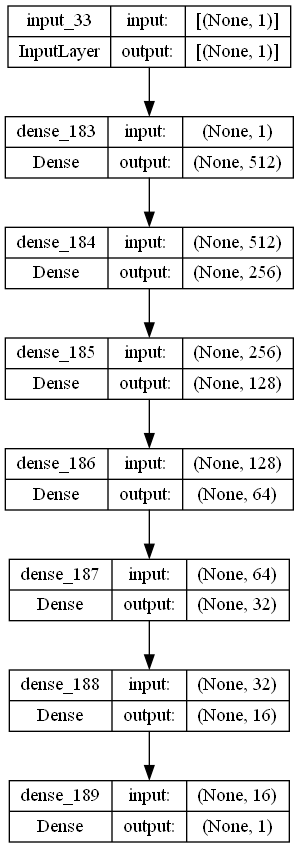

In [105]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [106]:
def plotter_util(x_train, y_train, x_test, y_test, y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train, y_train, c='b', label='training data')
    plt.scatter(x_test, y_test, c='g', label='testing data')
    plt.scatter(x_test, y_pred, c='r', label='predictions')
    plt.legend();

In [107]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 31ms/step


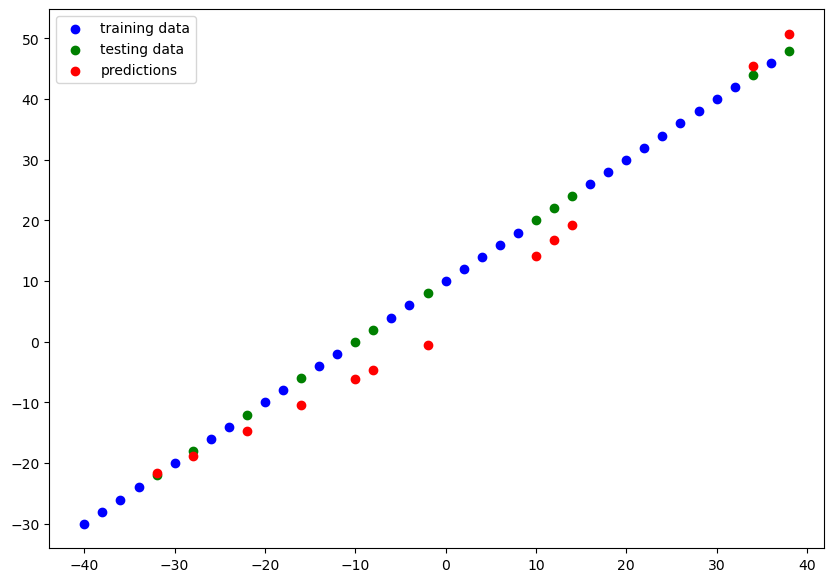

In [108]:
plotter_util(x_train, y_train, x_test, y_test, y_pred)